In [183]:
import sys
import os
script_dir = os.getcwd() # coleata o diretorio do projeto atual
sys.path.append(script_dir)

In [184]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, models

In [185]:
def load_data_base(local_base):

    data = []
    subdirectory_classes = [(directory.path, directory.name) for directory in os.scandir(local_base) if directory.is_dir()]
    for x in subdirectory_classes:  
        print(x)
    print(len(subdirectory_classes))

    for directory, label in subdirectory_classes:
        class_images = []
        files = os.listdir(directory)    

        for file in files:
            image_path = os.path.join(directory, file)
            image = cv2.imread(image_path)

            if image is not None:
                class_images.append((image, label))
            else:
                print(f"Erro ao carregar a imagem: {image_path}")
                
        data.append(class_images)

    return data

In [186]:
def contar_imagens_por_pasta(list_class):
    dados = []

    for class_type in list_class:
        classe = class_type[0][1]
       
        dados.append({'Classe': classe, 'Número de Imagens': len(class_type)})

    # Cria um DataFrame com os dados
    df = pd.DataFrame(dados)
    # Ordena o DataFrame pela classe
    df = df.sort_values(by='Classe').reset_index(drop=True)
    
    return df

In [187]:
def split_train_test(data, test_size=0.2):
    train_data = []
    test_data = []

    for class_images in data:
        # Separar as imagens e suas etiquetas
        images, labels = zip(*class_images)
        # Dividir os dados em conjuntos de treinamento e teste
        train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=42)
        # Adicionar os conjuntos de treinamento e teste às respectivas listas
        train_data.append(list(zip(train_images, train_labels)))
        test_data.append(list(zip(test_images, test_labels)))

    return train_data, test_data

In [188]:
dir_base_img = script_dir + r'\data'
data_base = load_data_base(dir_base_img)

('c:\\Users\\Pichau\\Desktop\\Faculdade\\Projects\\Facul Repositorios\\Repositorios_Universitarios\\Processamento_imagens\\aula04\\data\\airplane', 'airplane')
('c:\\Users\\Pichau\\Desktop\\Faculdade\\Projects\\Facul Repositorios\\Repositorios_Universitarios\\Processamento_imagens\\aula04\\data\\car', 'car')
('c:\\Users\\Pichau\\Desktop\\Faculdade\\Projects\\Facul Repositorios\\Repositorios_Universitarios\\Processamento_imagens\\aula04\\data\\cat', 'cat')
('c:\\Users\\Pichau\\Desktop\\Faculdade\\Projects\\Facul Repositorios\\Repositorios_Universitarios\\Processamento_imagens\\aula04\\data\\dog', 'dog')
('c:\\Users\\Pichau\\Desktop\\Faculdade\\Projects\\Facul Repositorios\\Repositorios_Universitarios\\Processamento_imagens\\aula04\\data\\flower', 'flower')
('c:\\Users\\Pichau\\Desktop\\Faculdade\\Projects\\Facul Repositorios\\Repositorios_Universitarios\\Processamento_imagens\\aula04\\data\\fruit', 'fruit')
('c:\\Users\\Pichau\\Desktop\\Faculdade\\Projects\\Facul Repositorios\\Repositor

In [189]:
contar_imagens_por_pasta(data_base)

,Classe,Número de Imagens
0,airplane,727
1,car,968
2,cat,885
3,dog,702
4,flower,843
5,fruit,1000
6,motorbike,788
7,person,986


In [190]:
train_data, test_data = split_train_test(data_base, 0.2)
contar_imagens_por_pasta(train_data)

,Classe,Número de Imagens
0,airplane,581
1,car,774
2,cat,708
3,dog,561
4,flower,674
5,fruit,800
6,motorbike,630
7,person,788


In [191]:
contar_imagens_por_pasta(test_data)

,Classe,Número de Imagens
0,airplane,146
1,car,194
2,cat,177
3,dog,141
4,flower,169
5,fruit,200
6,motorbike,158
7,person,198


In [192]:
def extract_histoI_gray(set_data):
    images = []
    labels = []
    for data in set_data:
        for image_label in data:
            images.append(cv2.calcHist([image_label[0]], [0], None, [256], [0,256]))
            labels.append(image_label[1])

    return images, labels

In [193]:
train_data, train_label = extract_histoI_gray(train_data)
test_data, test_label = extract_histoI_gray(test_data)

In [194]:
train_data = ([np.array([np.concatenate(item).tolist()]) for item in train_data])
test_data = ([np.array([np.concatenate(item).tolist()]) for item in test_data])

In [195]:
print(f"Total de classes: {set(train_label)}")

Total de classes: {'car', 'airplane', 'dog', 'cat', 'fruit', 'motorbike', 'person', 'flower'}


In [196]:
print(train_data[0])
print(train_label)

[[568. 147. 155. 176. 171. 135. 134. 162. 136. 144. 138. 110. 113. 113.
  126. 122. 100. 119. 147. 128. 151. 157. 174. 158. 190. 192. 222. 204.
  247. 289. 273. 271. 299. 293. 379. 358. 433. 470. 439. 470. 520. 612.
  618. 623. 580. 488. 450. 417. 386. 328. 313. 334. 344. 312. 298. 294.
  296. 322. 353. 330. 295. 312. 314. 348. 331. 416. 374. 438. 414. 409.
  396. 370. 340. 305. 252. 175. 144. 134. 139. 122.  98.  83. 114. 113.
  106. 108. 120. 109.  93.  95. 106. 119. 115. 113.  97. 121. 103. 141.
   99. 129. 131. 135. 110. 118. 125. 104. 115. 101. 111.  80.  83.  56.
   57.  64.  45.  43.  37.  35.  36.  31.  28.  28.  22.  19.  14.  10.
   22.  17.  12.  10.   6.   5.  12.  10.  21.  19.  11.   8.   9.   9.
   12.   5.  10.   0.   7.   8.  11.  15.   8.   5.   4.   5.   4.   4.
    3.   3.   4.   0.   2.   2.   5.   0.   0.   1.   3.   3.   0.   2.
    1.   1.   0.   1.   0.   1.   2.   2.   0.   1.   0.   0.   1.   2.
    0.   0.   0.   1.   1.   1.   1.   0.   0.   0.   0.   0.   

In [197]:
print(len(train_data))
print(len(test_data))

5516
1383


In [198]:
def plot_histograma(histograma):
    # Plotar o histograma
    plt.plot(histograma, color='black')
    plt.xlabel('Tons de Cinza')
    plt.ylabel('Número de Pixels')
    plt.title('Histograma em Tons de Cinza')
    plt.show()

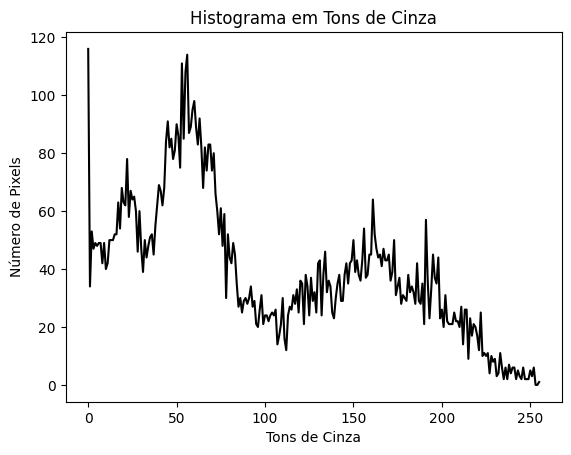

Label: car


In [199]:
imagem = 1065
plot_histograma(train_data[imagem][0])
print(f"Label: {train_label[imagem]}")

In [200]:
def create_model(input_dim, output_dim, dense_layers):
    model = models.Sequential()
    
    # Redimensionar os dados de entrada
    model.add(layers.Reshape((input_dim,), input_shape=(1, input_dim)))
    
    model.add(layers.Dense(dense_layers[0], activation='relu'))

    for neurons in dense_layers[1:]:
        model.add(layers.Dense(neurons, activation='relu'))

    model.add(layers.Dense(output_dim, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [201]:
# Exemplo de uso
input_dim = len(train_data[0][0])
output_dim = len(set(train_label))  # Suponha que temos 10 classes de saída
dense_layers = [128, 128]  # Dois layers densos

model = create_model(input_dim, output_dim, dense_layers)

c:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [202]:
model.summary()
model.input_shape

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_4 (Reshape)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,440 (197.03 KB)

 Trainable params: 50,440 (197.03 KB)

 Non-trainable params: 0 (0.00 B)

(None, 1, 256)

In [203]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [217]:
# Adicionar uma dimensão extra para representar o tamanho do lote
imagem_para_avaliar_batch = np.expand_dims(train_data[0], axis=0)
print(imagem_para_avaliar_batch.shape)
# Faça a previsão usando o modelo
saida = model.predict(imagem_para_avaliar_batch)
# A saída é uma matriz de probabilidades para cada classe
print(saida)

(1, 1, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[3.4767067e-22 6.6080266e-01 4.9765628e-02 5.0604530e-02 2.2630285e-05
  1.5363590e-01 1.4177068e-10 8.5168682e-02]]


In [205]:
def train_model(model, train_data, train_label, epochs=10, batch_size=32):
    model.fit(train_data, train_label, epochs=epochs, batch_size=batch_size)
    return model

In [206]:
# Convertendo os rótulos para codificação one-hot
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_label)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
train_label_encoded = onehot_encoder.fit_transform(integer_encoded)
print(len(train_label_encoded))

5516


c:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [207]:
from keras.utils import to_categorical

# Converter rótulos para números
label_dict = {'car': 0, 'airplane': 1, 'dog': 2, 'cat': 3, 'fruit': 4, 'motorbike': 5, 'person': 6, 'flower': 7}
train_label_numeric = [label_dict[label] for label in train_label]
train_label_numeric_test = [label_dict[label] for label in test_label]

# Converter rótulos para one-hot encoding
train_label_one_hot = to_categorical(train_label_numeric, num_classes=8)
train_label_one_hot_test = to_categorical(train_label_numeric_test, num_classes=8)

In [208]:
print(train_data.shape)  # Saída: (número_de_amostras, ...)
print(train_label_one_hot.shape)  # Saída: (número_de_amostras, número_de_classes)

(5516, 1, 256)
(5516, 8)


In [209]:
history = model.fit(train_data, train_label_one_hot, validation_data=(test_data, train_label_one_hot_test), epochs=1000, batch_size=100)

Epoch 1/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2477 - loss: 151.9985 - val_accuracy: 0.3536 - val_loss: 44.2332
Epoch 2/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3606 - loss: 30.1112 - val_accuracy: 0.3832 - val_loss: 30.0034
Epoch 3/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3916 - loss: 17.5844 - val_accuracy: 0.3861 - val_loss: 24.4310
Epoch 4/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4265 - loss: 11.7433 - val_accuracy: 0.3702 - val_loss: 19.8138
Epoch 5/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4194 - loss: 10.0519 - val_accuracy: 0.4179 - val_loss: 16.4032
Epoch 6/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4407 - loss: 7.4445 - val_accuracy: 0.4056 - val_loss: 16.3607
Epoch 7/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4367 - loss: 10.3123 - val_accuracy: 0.3745 - val_loss: 17.8905
Epoch 8/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4218 - loss: 9.5600 - va

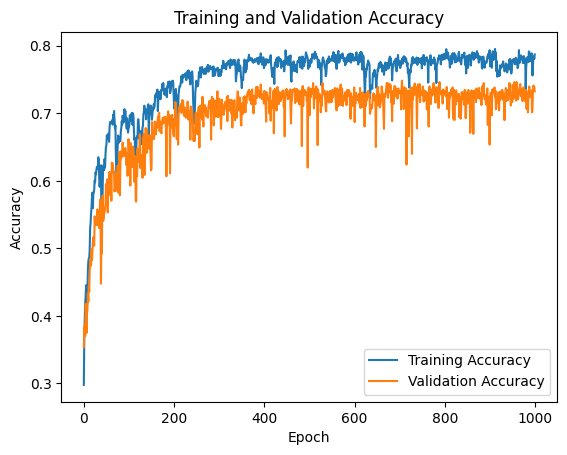

In [210]:
# Extrair métricas de treinamento
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotar gráfico da acurácia
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [232]:
import numpy as np

# Defina o número de exemplos a serem exibidos
n = 5

# Obtenha índices aleatórios dentro do intervalo de tamanho da base de dados
indices_aleatorios = np.random.choice(len(train_data), n, replace=False)

# Iterar sobre os exemplos selecionados aleatoriamente
for i in indices_aleatorios:
    # Adicionar uma dimensão extra para representar o tamanho do lote
    imagem_para_avaliar_batch = np.expand_dims(train_data[i], axis=0)
    
    # Faça a previsão usando o modelo
    saida = model.predict(imagem_para_avaliar_batch)
    
    # Encontrar o índice da classe com maior probabilidade na saída
    classe_predita_index = np.argmax(saida)
    
    # Mapear o índice da classe de volta para a classe correspondente usando o dicionário de rótulos
    classe_predita = list(label_dict.keys())[list(label_dict.values()).index(classe_predita_index)]
    
    # Imprimir informações sobre a classe real e a classe predita
    print(f"Exemplo {i+1}:")
    print("Classe Real:", train_label[i])
    print("Classe Predita:", classe_predita)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Exemplo 4665:
Classe Real: motorbike
Classe Predita: motorbike

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Exemplo 4024:
Classe Real: fruit
Classe Predita: fruit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Exemplo 1158:
Classe Real: car
Classe Predita: car

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Exemplo 4127:
Classe Real: motorbike
Classe Predita: motorbike

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Exemplo 2995:
Classe Real: flower
Classe Predita: flower

